## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [ ]:

df = pd.read_csv("CAR DETAILS.csv")

## Cleaning the Data

In [25]:

# Step 1: Load the data
data = df

df = pd.DataFrame(data)

# Step 2: Check for missing values
missing_values = df.isnull().sum()

# Step 3: Check and convert data types if necessary
data_types = df.dtypes

# Step 4: Identify outliers in numerical columns
# For simplicity, we will use the IQR method for outlier detection
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['selling_price'] < (Q1 - 1.5 * IQR)) | (df['selling_price'] > (Q3 + 1.5 * IQR))

# Step 5: Check consistency of categorical values
unique_fuels = df['fuel'].unique()
unique_seller_types = df['seller_type'].unique()
unique_owners = df['owner'].unique()

# Step 6: Remove duplicates
duplicates = df.duplicated().sum()

# Display the results
missing_values, data_types, outlier_condition, unique_fuels, unique_seller_types, unique_owners, duplicates


(name             0
 year             0
 selling_price    0
 km_driven        0
 fuel             0
 seller_type      0
 transmission     0
 owner            0
 dtype: int64,
 name             object
 year              int64
 selling_price     int64
 km_driven         int64
 fuel             object
 seller_type      object
 transmission     object
 owner            object
 dtype: object,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 4335    False
 4336    False
 4337    False
 4338    False
 4339    False
 Name: selling_price, Length: 4340, dtype: bool,
 array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object),
 array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
        'Third Owner', 'Test Drive Car'], dtype=object),
 763)

## Explorotary Data Analysis

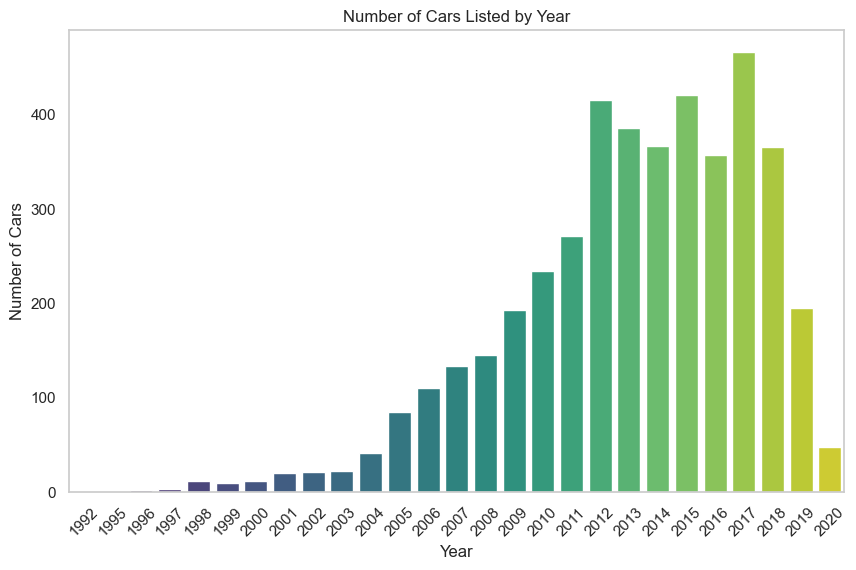

Number of cars listed by year:
1992      1
1995      1
1996      2
1997      3
1998     12
1999     10
2000     12
2001     20
2002     21
2003     23
2004     42
2005     85
2006    110
2007    134
2008    145
2009    193
2010    234
2011    271
2012    415
2013    386
2014    367
2015    421
2016    357
2017    466
2018    366
2019    195
2020     48
Name: year, dtype: int64


In [26]:

# Set up the data again (if necessary)
data =df


df = pd.DataFrame(data)

# Step 1: Count the number of cars per year
car_counts = df['year'].value_counts().sort_index()

# Step 2: Visualize the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=car_counts.index, y=car_counts.values, palette='viridis')
plt.title('Number of Cars Listed by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Display the counts
print("Number of cars listed by year:")
print(car_counts)


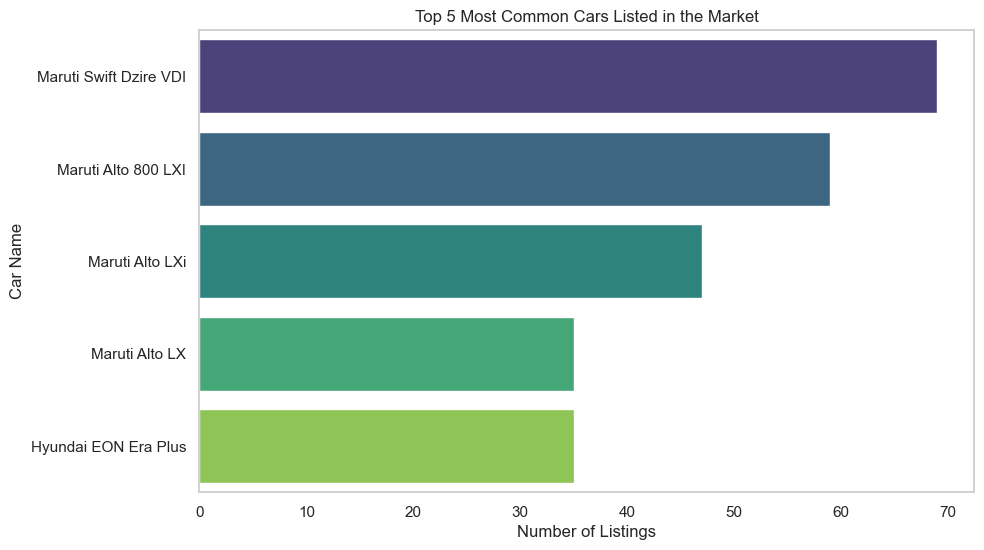

Number of listings for the top 5 cars:
Maruti Swift Dzire VDI    69
Maruti Alto 800 LXI       59
Maruti Alto LXi           47
Maruti Alto LX            35
Hyundai EON Era Plus      35
Name: name, dtype: int64


In [33]:

# Sample DataFrame setup (as per your previous data)
data =df
df = pd.DataFrame(data)

# Step 1: Count the occurrences of each car name
car_counts = df['name'].value_counts()

# Step 2: Get the top 5 cars
top_5_cars = car_counts.head(5)

# Step 3: Visualize the top 5 cars
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_cars.values, y=top_5_cars.index, palette='viridis')
plt.title('Top 5 Most Common Cars Listed in the Market')
plt.xlabel('Number of Listings')
plt.ylabel('Car Name')
plt.grid(axis='x')
plt.show()

# Display the counts of the top 5 cars
print("Number of listings for the top 5 cars:")
print(top_5_cars)


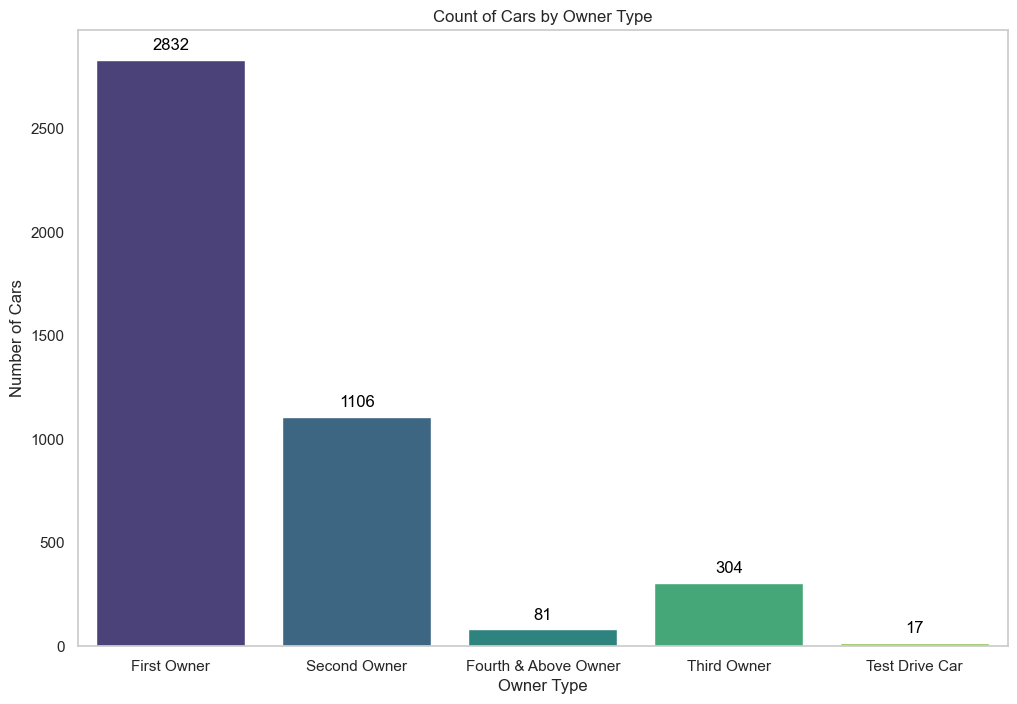

Number of cars for each owner type:
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [39]:


# Sample DataFrame setup (as per your previous data)
data =df
df = pd.DataFrame(data)

# Step 1: Count the occurrences of each owner type
owner_counts = df['owner'].value_counts()

# Step 2: Visualize the owner types
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='owner', data=df, palette='viridis')
plt.title('Count of Cars by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Number of Cars')
plt.grid(axis='y')

# Step 3: Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

# Display the counts
print("Number of cars for each owner type:")
print(owner_counts)


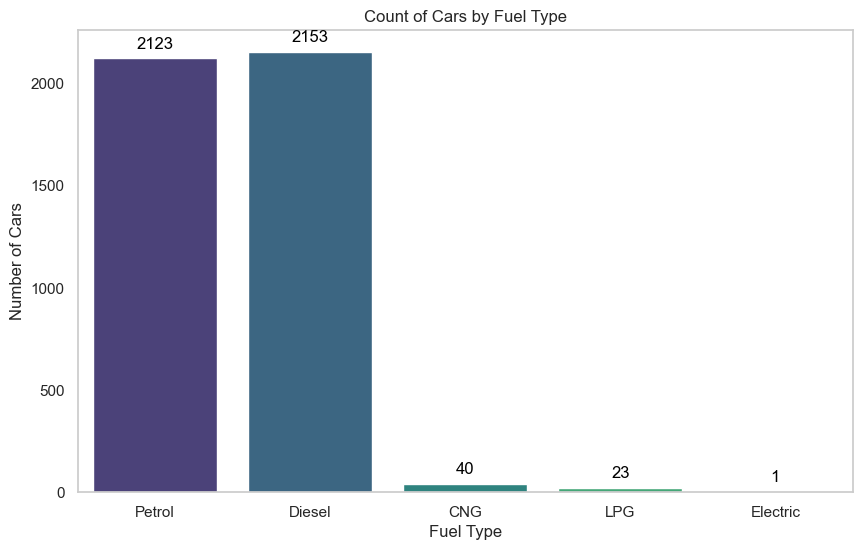

In [46]:
# Count of Cars by Fuel Type
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='fuel', data=df, palette='viridis')
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.grid(axis='y')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()



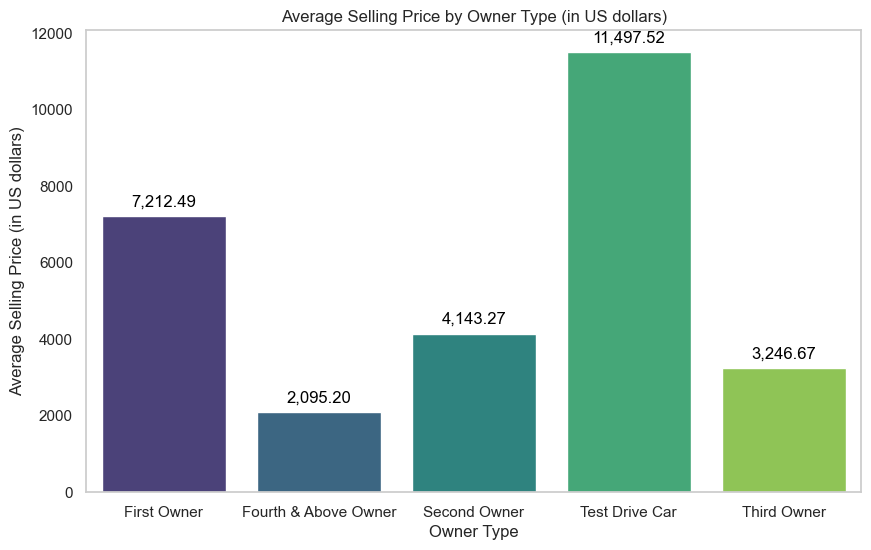

In [51]:
# Average Selling Price by Owner Type
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame setup (as per your previous data)
data = df
df = pd.DataFrame(data)

# Convert selling price to US dollars by dividing by 83
df['selling_price_usd'] = df['selling_price'] / 83

# Average Selling Price by Owner Type
plt.figure(figsize=(10, 6))
avg_price_owner = df.groupby('owner')['selling_price_usd'].mean().reset_index()
ax = sns.barplot(x='owner', y='selling_price_usd', data=avg_price_owner, palette='viridis')
plt.title('Average Selling Price by Owner Type (in US dollars)')
plt.xlabel('Owner Type')
plt.ylabel('Average Selling Price (in US dollars)')
plt.grid(axis='y')

# Annotate the bars with their average selling prices
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()




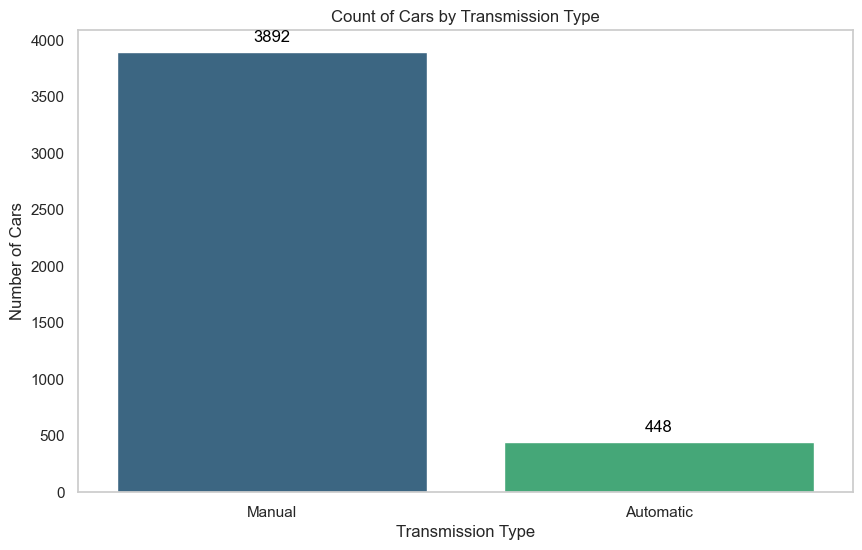

In [48]:
# Count of Cars by Transmission Type
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='transmission', data=df, palette='viridis')
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.grid(axis='y')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()
